### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
ratings=pd.read_csv("Data.csv")
movies=pd.read_csv("item.csv")
users=pd.read_csv("user.csv")

In [3]:
print(ratings.head())
print(movies.head())
print(users.head())

   user id  movie id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596
   movie id  movie title release date  unknown  Action  Adventure  Animation  \
0         1   Toy Story   01-Jan-1995        0       0          0          1   
1         2   GoldenEye   01-Jan-1995        0       1          1          0   
2         3  Four Rooms   01-Jan-1995        0       0          0          0   
3         4  Get Shorty   01-Jan-1995        0       1          0          0   
4         5     Copycat   01-Jan-1995        0       0          0          0   

   Childrens  Comedy  Crime  ...  Fantasy  Film-Noir  Horror  Musical  \
0          1       1      0  ...        0          0       0        0   
1          0       0      0  ...        0          0       0        0   
2          0       0      0  ...        0          0       0

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
ratings.shape

(100000, 4)

In [6]:
ratings.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [7]:
print("Number of missing values in movie ratings dataframe is %d" %(ratings.isnull().sum().sum()))

Number of missing values in movie ratings dataframe is 0


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [9]:
movies.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
movies.shape

(1681, 22)

In [11]:
print("Number of missing values in movie dataframe is %d" %(movies.isnull().sum().sum()))

Number of missing values in movie dataframe is 0


In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [13]:
users.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [14]:
users.shape

(943, 5)

In [15]:
print("Number of missing values in user dataframe is %d" %(users.isnull().sum().sum()))

Number of missing values in user dataframe is 0


#### 4. Find the number of movies per genre using the item data - 5 marks

In [16]:
# use sum on the default axis
# Get all categories
movie_categories=[x for x in movies.columns if (x!="movie id" and x!="movie title" and x!="release date")]
movies[movie_categories].sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [17]:
#hint: use sum on the axis = 1
movies[movies[movie_categories].sum(axis=1)>1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,1669,MURDER and murder,20-Jun-1997,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1668,1670,Tainted,01-Feb-1998,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1671,1673,Mirage,01-Jan-1995,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [18]:
unknown_indexes = movies[movies['unknown'] == 1 ].index
print("Number of unknown category movies is %d" %(movies['unknown'].sum()))
print("Dropping unknown categories...")
movies.drop(unknown_indexes, inplace=True)
print("Number of unknown category movies now is %d" %(movies['unknown'].sum()))

Number of unknown category movies is 1
Dropping unknown categories...
Number of unknown category movies now is 0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [19]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

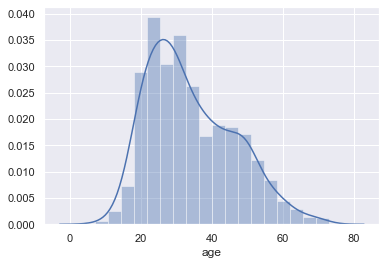

In [20]:
#distplot for users ages
sns.distplot(users['age'])

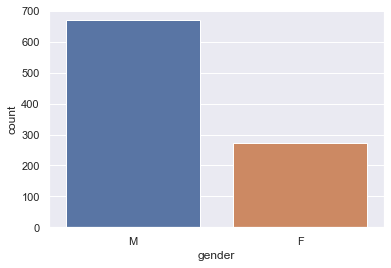

In [21]:
#countplot for users gender
sns.countplot(users['gender'])

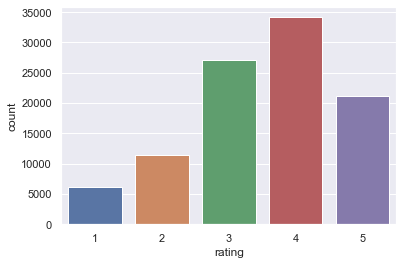

In [22]:
#countplot for ratings
sns.countplot(ratings['rating'])

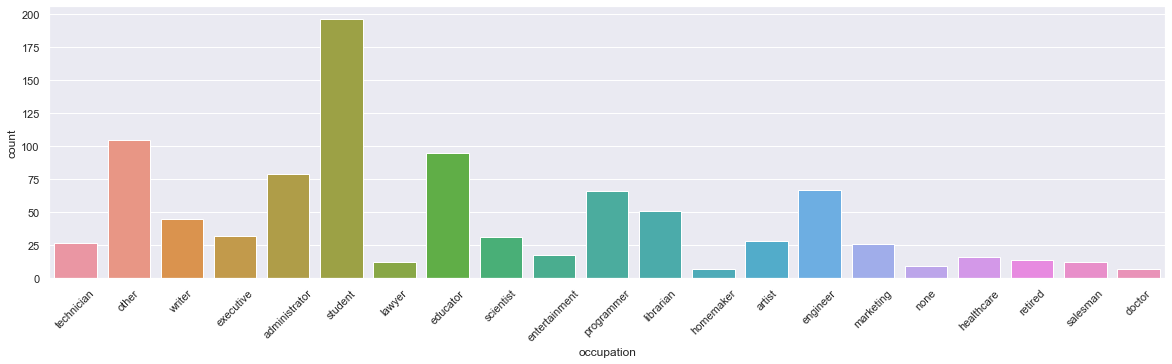

In [23]:
# Widen the plot
plt.figure(figsize=(20,5))
occupation_plt=sns.countplot(users['occupation'])
#Slanted labels which makes all labels clear, otherwise some labels overlap.
occupation_plt.set_xticklabels(occupation_plt.get_xticklabels(), rotation=45) ;

In [24]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


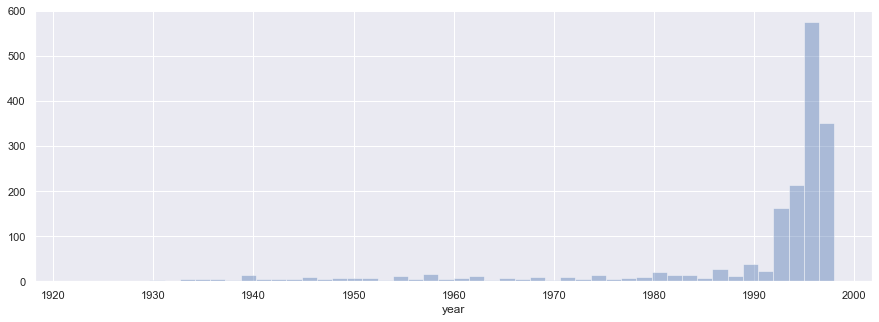

In [25]:
#your answers here
plt.figure(figsize=(15,5))
movies['year']=movies['release date'].apply(lambda date: date.split('-')[2])
sns.distplot(movies['year'], kde=False)

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

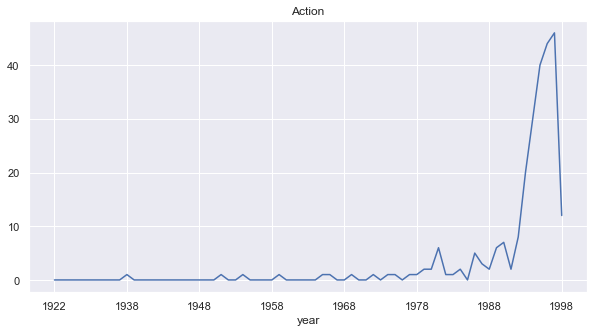

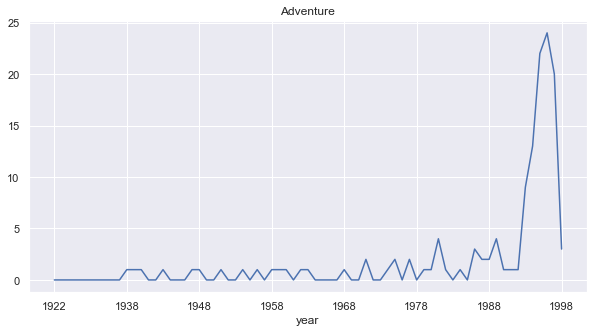

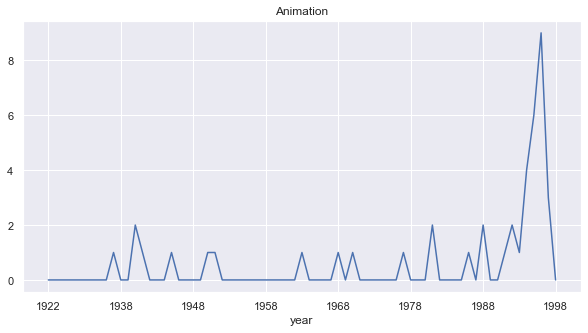

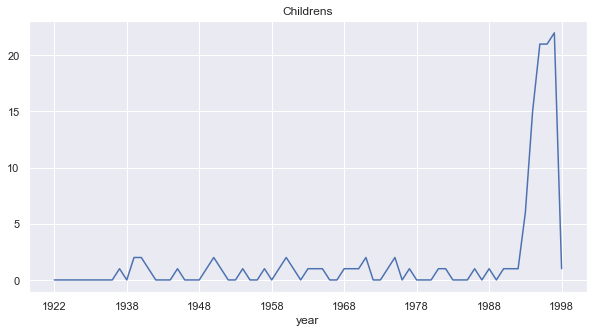

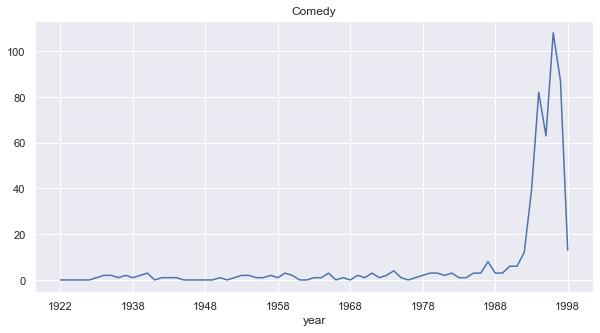

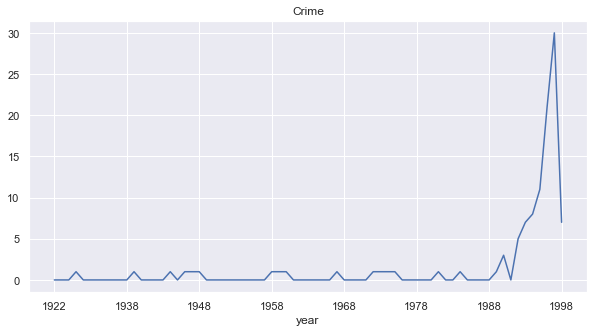

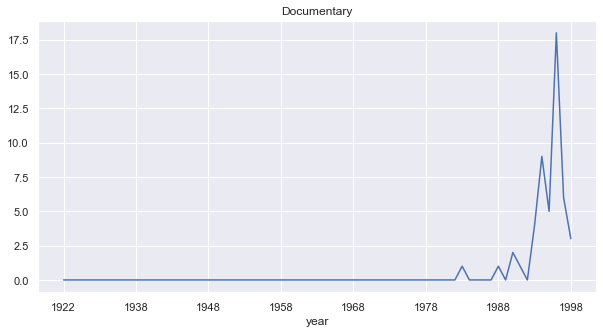

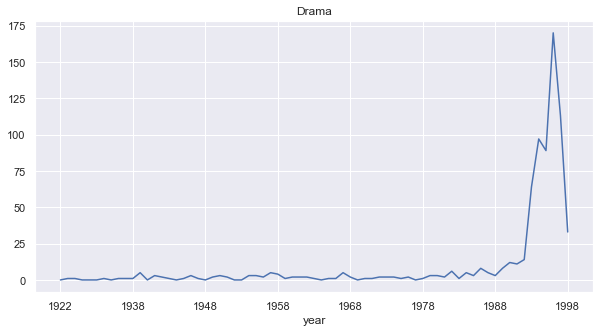

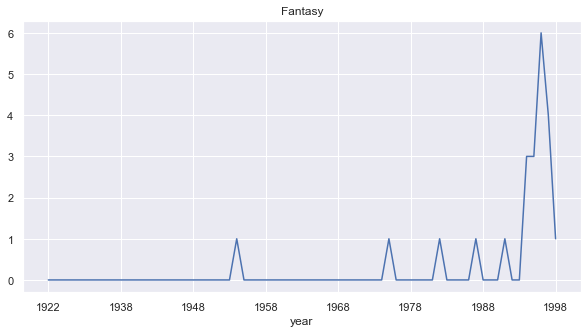

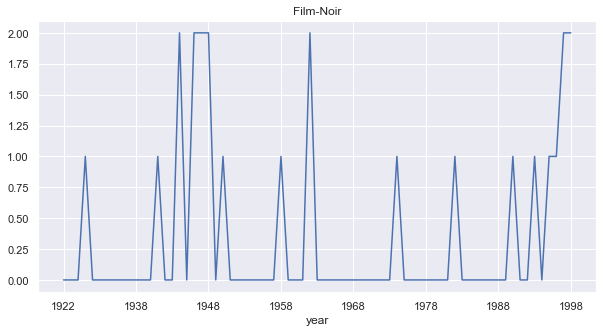

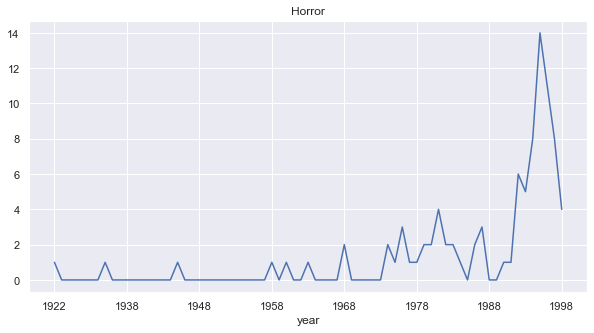

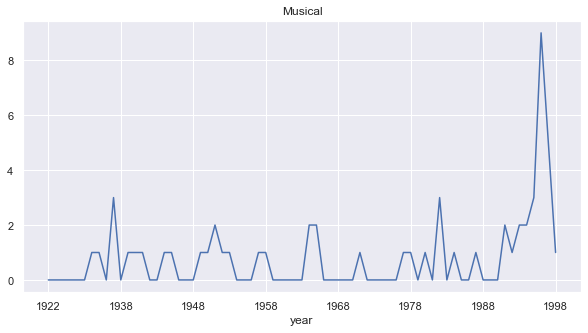

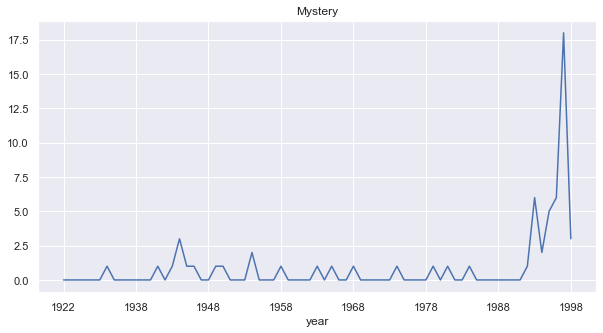

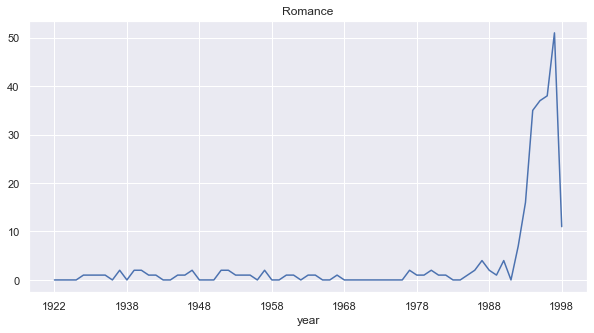

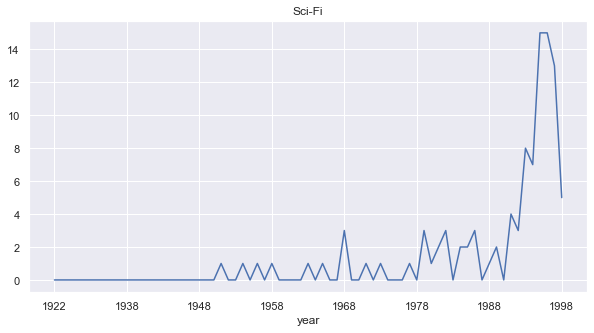

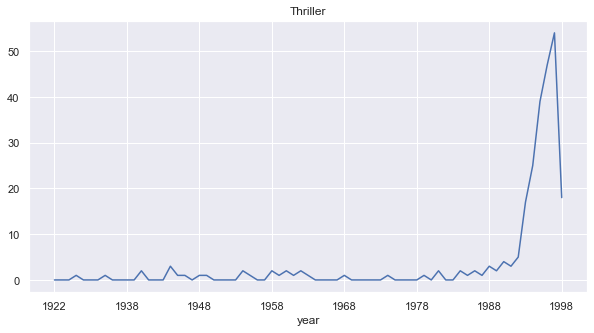

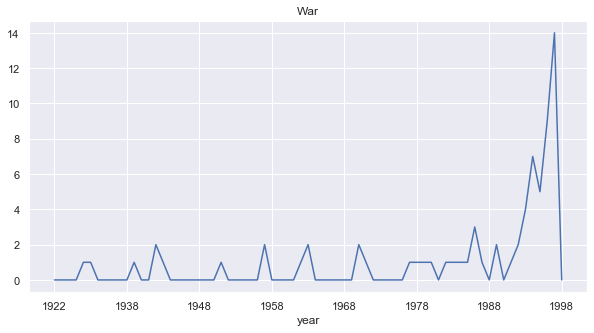

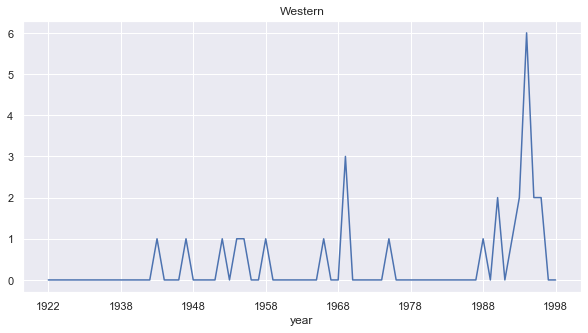

In [26]:
## Your answer here
# We have already figured out the genres in movie_categories, remove 'unknown' and add year to this
movie_categories.remove('unknown')
categories_year=movie_categories+['year']

genres_by_year=movies[categories_year].groupby('year').sum()
for genre in movie_categories:
    plt.figure(figsize=(10,5))
    genres_by_year[genre].plot(title=genre)

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [27]:
#your answer here
movies_ratings=ratings.groupby('movie id').count()
movies_r100=list(movies_ratings[movies_ratings['rating']>100].index)
# movies_r100 has all the movies with over 100 ratings

avg_ratings=ratings[['movie id', 'rating']].groupby('movie id').mean()
movie_avg_ratings=pd.merge(avg_ratings, movies, right_on='movie id', left_index=True)
movies_sorted=movie_avg_ratings[movies['movie id'].isin(movies_r100)].sort_values(by='rating', ascending=False)
print("The top 25 rated movies are (with more than 100 ratings):")
print(movies_sorted.iloc[:25][['movie title', 'rating']])

The top 25 rated movies are (with more than 100 ratings):
                                           movie title    rating
406                                    Close Shave, A   4.491071
316                                  Schindler's List   4.466443
168                               Wrong Trousers, The   4.466102
481                                        Casablanca   4.456790
63                          Shawshank Redemption, The   4.445230
601                                       Rear Window   4.387560
11                                Usual Suspects, The   4.385768
49                                          Star Wars   4.358491
177                                      12 Angry Men   4.344000
133                                      Citizen Kane   4.292929
425                             To Kill a Mockingbird   4.292237
355                   One Flew Over the Cuckoo's Nest   4.291667
97                          Silence of the Lambs, The   4.289744
478                             

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [28]:
movies_user=pd.merge(ratings, users, on='user id')[['user id', 'gender', 'movie id']]
movies_user_genre=pd.merge(movies_user, movies, on='movie id')
by_gender=users.groupby('gender').count()

total_women=by_gender.loc['F'][0]
total_men=by_gender.loc['M'][0]

print("Total Men = %d and Total Women = %d" %(total_men, total_women))

def count_by_gender(data, genre):
    genre_movies=data[(data[genre]>0)]
    genre_by_gender=genre_movies.groupby('gender').count()
    return (genre_by_gender[genre].loc['M'], genre_by_gender[genre].loc['F'])


(men, women)=count_by_gender(movies_user_genre, 'Drama')
# Calculate the number of movies of a particular genre watched per man and per woman
(avg_men, avg_women)=(men/total_men, women/total_women)
print ("Average number of drama movies watched by men=%0.2f and women=%0.2f" %(avg_men, avg_women))

if (avg_men > avg_women):
    print("It is true that men watch more drama movies than women")
else:
    print("It is not true that men watch more drama movies than women")
    
        
(men, women)=count_by_gender(movies_user_genre, 'Sci-Fi')
(avg_men, avg_women)=(men/total_men, women/total_women)
print ("Average number of Sci-Fi movies watched by men=%0.2f and women=%0.2f" %(avg_men, avg_women))

if (avg_women > avg_men):
    print("It is true that women watch more Sci-Fi movies than men")
else:
    print("It is not true that women watch more Sci-Fi movies than men")
    
        
(men, women)=count_by_gender(movies_user_genre, 'Romance')
(avg_men, avg_women)=(men/total_men, women/total_women)
print ("Average number of Romance movies watched by men=%0.2f and women=%0.2f" %(avg_men, avg_women))

if (avg_men > avg_women):
    print("It is true that men watch more Romance movies than women")
else:
    print("It is not true that men watch more Romance movies than women")

Total Men = 670 and Total Women = 273
Average number of drama movies watched by men=43.11 and women=40.32
It is true that men watch more drama movies than women
Average number of Sci-Fi movies watched by men=15.08 and women=9.63
It is not true that women watch more Sci-Fi movies than men
Average number of Romance movies watched by men=20.30 and women=21.46
It is not true that men watch more Romance movies than women
